In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.duplicated().sum()

0

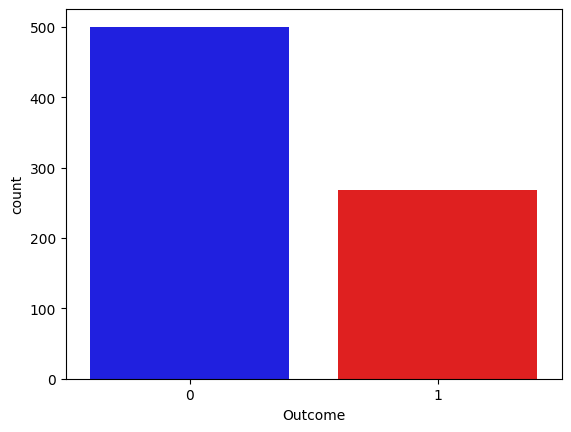

In [6]:
sns.countplot(x= 'Outcome' , data=data , palette=['b','r'])
plt.show()

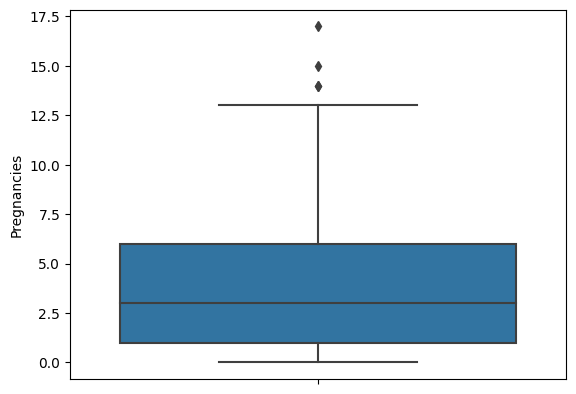

In [7]:
sns.boxplot(y = data['Pregnancies'])
plt.show()

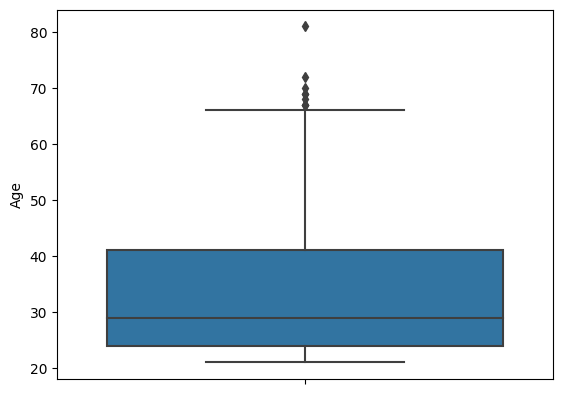

In [8]:
sns.boxplot(y = data['Age'])
plt.show()

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


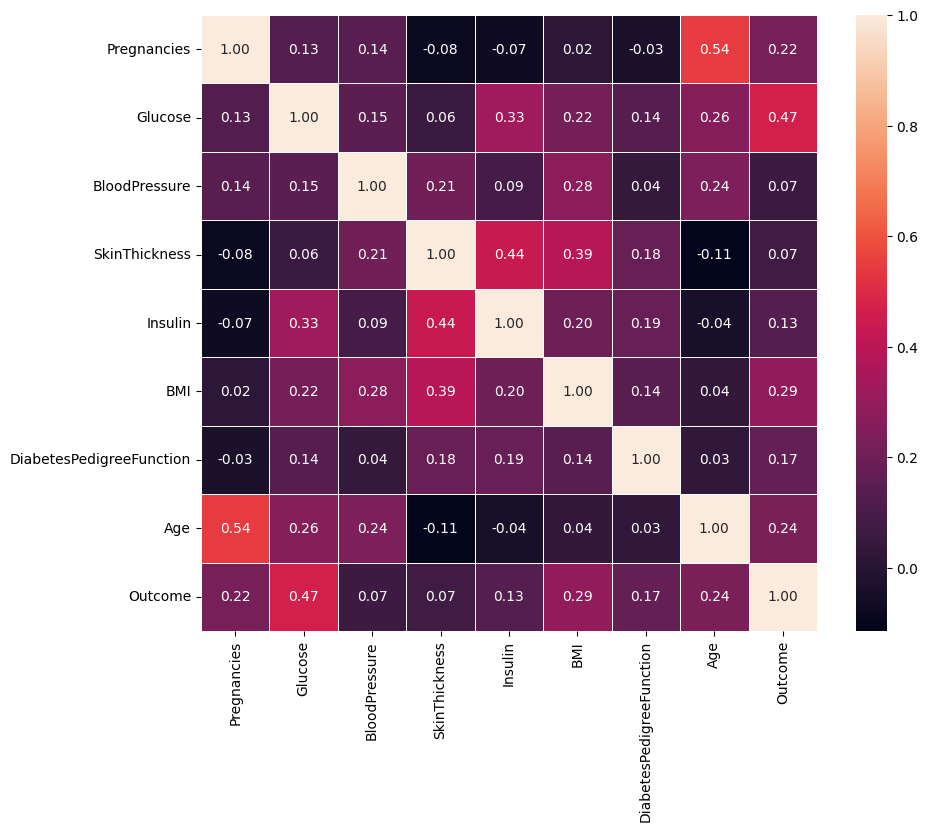

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [11]:
feature = data.drop('Outcome' , axis=1)
target = data['Outcome']

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(feature , target , test_size=0.2 , random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train , y_train)
m1_predicted = model_1.predict(x_test)
from sklearn.metrics import  classification_report
print(classification_report(m1_predicted , y_test))

from sklearn.metrics import  accuracy_score
acc = accuracy_score(m1_predicted , y_test) * 100
acc = round(acc,1)
print(acc,'%')

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        96
           1       0.67      0.64      0.65        58

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.74      0.75      0.75       154

74.7 %


In [14]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(x_train , y_train)
m2_predicted = model_2.predict(x_test)
from sklearn.metrics import  classification_report
print(classification_report(m2_predicted , y_test))

from sklearn.metrics import  accuracy_score
acc = accuracy_score(m2_predicted , y_test) * 100
acc = round(acc,1)
print('accuracy score:',acc,'%')

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        90
           1       0.71      0.61      0.66        64

    accuracy                           0.73       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.73      0.73      0.73       154

accuracy score: 73.4 %


In [15]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(x_train , y_train)
m3_predicted = model_3.predict(x_test)
from sklearn.metrics import  classification_report
print(classification_report(m3_predicted , y_test))

from sklearn.metrics import  accuracy_score
acc = accuracy_score(m3_predicted , y_test) * 100
acc = round(acc,1)
print(acc,'%')

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        95
           1       0.65      0.61      0.63        59

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.72      0.73      0.73       154

72.7 %


In [16]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(x_train , y_train)
m4_predicted = model_4.predict(x_test)
from sklearn.metrics import  classification_report
print(classification_report(m4_predicted , y_test))

from sklearn.metrics import  accuracy_score
acc = accuracy_score(m4_predicted , y_test) * 100
acc = round(acc,1)
print(acc,'%')

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       111
           1       0.56      0.72      0.63        43

    accuracy                           0.77       154
   macro avg       0.72      0.75      0.73       154
weighted avg       0.79      0.77      0.77       154

76.6 %


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model_5 = SVC()
model_5.fit(x_train , y_train)
m5_predicted = model_5.predict(x_test)
from sklearn.metrics import  classification_report
print(classification_report(m5_predicted , y_test))

from sklearn.metrics import  accuracy_score
acc = accuracy_score(m5_predicted , y_test) * 100
acc = round(acc,1)
print(acc,'%')

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       111
           1       0.56      0.72      0.63        43

    accuracy                           0.77       154
   macro avg       0.72      0.75      0.73       154
weighted avg       0.79      0.77      0.77       154

76.6 %
